# This notebook got 0.8762 in one line of code (see below)
##  Turn on the GPU Accelerator in this Notebook to get the fastest Results below using XGBoost

## Goal: Use Featurwiz to build a better ranking model in TPS
1.  Big_Mart Sales Prediction Score: 1147  -- Rank 250 out of 41,361 = That's a Top <1% Rank!!
1.  Loan Status Predictions Score 0.791  -- Rank 850 out of 67,424 - Top 1.25% Rank
1.  Machine Hack Flight Ticket Score 0.9389 -- Rank 165 out of 2723 - Top 6% Rank!
1.  Machine Hack Data Scientist Salary class Score 0.417 -- Rank 58 out of 1547 - Top 3.7% Rank! (Autoviml Score was 0.329 -- less than 0.417 of Featurewiz+Simple even though an NLP problem!)
1.  MCHACK Book Price NLP Score 0.7336 -- Rank 104 Autoviml NLP problem and should have done better

In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Install Featurewiz Library to Get the Max Benefits

In [5]:
#!pip install featurewiz

In [6]:
from featurewiz import FE_kmeans_resampler, FE_find_and_cap_outliers, EDA_find_outliers
from featurewiz import FE_convert_all_object_columns_to_numeric, split_data_n_ways, FE_create_categorical_feature_crosses
from featurewiz import FE_create_time_series_features, FE_concatenate_multiple_columns
from featurewiz import simple_XGBoost_model
import featurewiz as FW

Imported featurewiz: advanced feature engg and selection library. Version=0.0.31
output = featurewiz(dataname, target, corr_limit=0.70,
                    verbose=2, sep=',', header=0, test_data='',
                    feature_engg='', category_encoders='')
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)

In [8]:
from load_kaggle import load_kaggle

In [9]:
subm, train, test = load_kaggle()
print(train.shape, test.shape)
train.head(3)

submission found
train found
test found
found 3 files and loaded them into dataframes. Please examine returned list for dataframes
(300000, 32) (200000, 31)


,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.630,0.855,0.759,0.796,0.682,0.622,0.592,0.792,0.815,0.965,0.666,0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.371,0.329,0.386,0.541,0.389,0.358,0.600,0.409,0.399,0.927,0.494,0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502,0.323,0.343,0.616,0.794,0.553,0.352,0.389,0.412,0.293,0.549,0


In [15]:
### Drop the following categorical vars according to the Blog Post here ###
###     https://www.kaggle.com/c/tabular-playground-series-mar-2021/discussion/224530  #####  
drop_cols = ['cat5', 'cat7', 'cat8', 'cat10']
print(len(drop_cols))
drop_cols

4


['cat5', 'cat7', 'cat8', 'cat10']

In [16]:
target = 'target'
#df[target] = (df[target] - np.mean(df[target]))/np.std(df[target])
#train[target] = np.log(train[target].values)
idcols = ['id']
features = [x for x in list(test) if x not in idcols+drop_cols]

In [17]:
train = train[features+[target]]
df = train.copy(deep=True)
print(train.shape)
train.head(1)

(300000, 27)


,cat0,cat1,cat2,cat3,cat4,cat6,cat9,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,A,I,A,B,B,A,A,A,A,A,A,B,D,D,B,0.630,0.855,0.759,0.796,0.682,0.622,0.592,0.792,0.815,0.965,0.666,0


<AxesSubplot:>

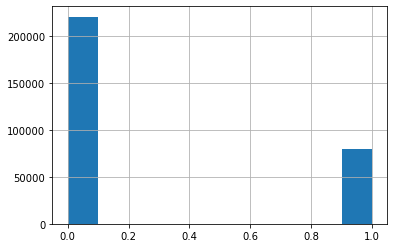

In [18]:
df[target].hist()

In [19]:
test = test[features]
print(test.shape)
test.head(1)

(200000, 26)


,cat0,cat1,cat2,cat3,cat4,cat6,cat9,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,A,F,A,A,F,A,A,A,A,A,A,B,D,D,B,0.708,0.736,0.578,0.723,0.228,0.356,0.551,0.656,0.598,0.360,0.947


# Just use this one line of code to get ~0.88 score in less than 2 mins!

In [20]:
y_preds,y_probas = simple_XGBoost_model(X_XGB=train[features], Y_XGB=train[target], X_XGB_test=test[features], 
                               modeltype='Classification', log_y=False,
                               GPU_flag=True, scaler=StandardScaler(), enc_method='label', verbose=0)

Number of processors on machine = 2
GPU available
    Running XGBoost using GPU parameters


|          | 0/? [00:00<?, ?it/s]

Balanced Accuracy score in fold 1 = 77.3%
Balanced Accuracy score in fold 2 = 76.8%
Balanced Accuracy score in fold 3 = 77.5%
Balanced Accuracy score in fold 4 = 77.5%
Balanced Accuracy score in fold 5 = 77.5%
Balanced Accuracy score in fold 6 = 77.1%
Balanced Accuracy score in fold 7 = 77.4%
Balanced Accuracy score in fold 8 = 77.1%
Balanced Accuracy score in fold 9 = 77.1%
Balanced Accuracy score in fold 10 = 77.4%
Average scores are:  0.7727118946445204
final predictions [0 0 0 ... 0 0 0]
sample of predicted probabilities [[0.79477656 0.20522346]
 [0.5947838  0.40521622]
 [0.92295337 0.07704666]]


In [21]:
y_probas[:,1]

array([0.20522346, 0.40521622, 0.07704666, ..., 0.6769109 , 0.21496706,
       0.23740548], dtype=float32)

In [23]:
### Base model above with no feature engg gets you ~0.88 score which is a very nice score.
subm[target] = y_probas[:,1]
subm.to_csv('submission.csv',index=False)
subm.head()

,id,target
0,5,0.205
1,6,0.405
2,8,0.077
3,9,0.223
4,11,0.264


# Let's use Auto_ViML with GPU to see if we can do better

In [ ]:
#!pip install autoviml

In [ ]:
from autoviml.Auto_ViML import Auto_ViML

## Use AutoViz to gain some insights - here's what I understood
important vars - leave them as is
cont1
cont3
cont5
cont6
cont8

bin the following:
cont0 4
cont1 5
cont3 2
cont4 2
cont6 3
cont8 3
cont10 10

groupby vars
cont3 by cat2
cont1 by cat4
cont3 by cat4


interaction cat vars - feature crosses
cat4 x cat18
cat13 x cat4
cat13 x cat2

interaction vars and then bin them
cont3 x cont7
cont3 x cont8
cont3 x cont9
cont3 x cont10
cont4 x cont5
cont4 x cont6
cont4 x cont9
cont4 x cont10

Boolean cats - leave them as is
cat0
cat1
cat12
cat13
cat14
cat15
cat16

log transform these
cont5
cont8
cont7


In [ ]:
#!pip install autoviz

In [ ]:
#from autoviz.AutoViz_Class import AutoViz_Class
#AV = AutoViz_Class()
#filename = ""
#sep = ","
#dft = AV.AutoViz(
#    filename,
#    sep=",",
#    depVar=target,
#    dfte=train,
#    header=0,
#    verbose=0,
#    lowess=False,
#    chart_format="svg",
#    max_rows_analyzed=30000,
#    max_cols_analyzed=30,
#)

## Feature Engineering using Featurewiz begins here using insights from AutoViz above

In [ ]:
### Step 1: we create numeric interaction variables first ###
intxn_vars = [('cont3', 'cont7'),('cont3', 'cont8'),('cont3', 'cont9'),('cont3', 'cont10'),('cont4', 'cont5'),
             ('cont4', 'cont6'),('cont4', 'cont9'),('cont4', 'cont10')]
def FE_create_interaction_vars(df, intxn_vars):
    """
    This handy function creates interaction variables among pairs of numeric vars you send in.
    Your input must be a dataframe and a list of tuples. Each tuple must contain a pair of variables.
    All variables must be numeric. Double check your input before sending them in.
    """
    df = df.copy(deep=True)
    for (each_intxn1,each_intxn2)  in intxn_vars:
        new_col = each_intxn1 + '_x_' + each_intxn2
        try:
            df[new_col] = df[each_intxn1] * df[each_intxn2]
        except:
            continue
    return df

In [ ]:
train = FE_create_interaction_vars(train, intxn_vars)
test = FE_create_interaction_vars(test, intxn_vars)

In [ ]:
### we must bin the above newly created discrete variables into 4 or 6 buckets. We will choose 6 for now
intx_cols = train.columns.tolist()[-8:]
intx_dict = dict(zip(intx_cols, [6]*8))
train, test = FW.FE_discretize_numeric_variables(train,intx_dict,test=test, strategy='gaussian')
print(train.shape, test.shape)
train.head(1)

In [ ]:
preds = [x for x in list(test) if x not in idcols]
len(preds)

In [ ]:
y_preds,y_probas = simple_XGBoost_model(X_XGB=train[preds], Y_XGB=train[target], X_XGB_test=test[preds], 
                               modeltype='Classification', log_y=False,
                               GPU_flag=True, scaler=StandardScaler(), enc_method='label', verbose=0)

In [ ]:
### The CV scores are less with new features. ####### So this is not worth adding these features
### <Let us discard the new interaction variables and go back to the old train, test data > 

In [ ]:
subm, train, test = load_kaggle()
print(train.shape, test.shape)
train.head(3)

In [ ]:
### step 2: we bin the following numeric variables using gaussian mixture models
bin_these = {'cont0': 4, 'cont1': 5, 'cont3': 2, 'cont4': 2, 'cont6': 3, 'cont8': 3, 'cont10': 10}
train, test = FW.FE_discretize_numeric_variables(train,bin_these,test=test, strategy='gaussian')
print(train.shape, test.shape)

In [ ]:
preds = [x for x in list(test) if x not in idcols]
len(preds)

In [ ]:
y_preds,y_probas = simple_XGBoost_model(X_XGB=train[preds], Y_XGB=train[target], X_XGB_test=test[preds], 
                               modeltype='Classification', log_y=False,
                               GPU_flag=True, scaler=StandardScaler(), enc_method='label', verbose=0)

In [ ]:
### The CV scores are not bad - let's keep these binned variables and add to them in next steps ##

In [ ]:
### step 3: next we create feature crosses of these categorical variables ###
train = FW.FE_create_categorical_feature_crosses(train, ['cat4','cat18','cat13','cat2'])
test = FW.FE_create_categorical_feature_crosses(test, ['cat4','cat18','cat13','cat2'])
print(train.shape, test.shape)

In [ ]:
preds = [x for x in list(test) if x not in idcols]
len(preds)

In [ ]:
y_preds,y_probas = simple_XGBoost_model(X_XGB=train[preds], Y_XGB=train[target], X_XGB_test=test[preds], 
                               modeltype='Classification', log_y=False,
                               GPU_flag=True, scaler=StandardScaler(), enc_method='label', verbose=0)

In [ ]:
### Absolutely no improvement - but we will keep these vars as long as performance is same! ####

In [ ]:
### step 4: create groupby aggregates of the following numerics 
agg_nums = ['cont1','cont3']
groupby_vars = ['cat2','cat4']
train_add, test_add = FW.FE_add_groupby_features_aggregated_to_dataframe(train[agg_nums+groupby_vars], agg_types=['mean','std'],
                                groupby_columns=groupby_vars,
                                ignore_variables=[] , test=test[agg_nums+groupby_vars])

In [ ]:
train_copy = train.join(train_add.drop(groupby_vars+agg_nums, axis=1))
test_copy = test.join(test_add.drop(groupby_vars+agg_nums, axis=1))
print(train_copy.shape, test_copy.shape)
train_copy.head(2)

In [ ]:
preds = [x for x in list(test_copy) if x not in idcols]
len(preds)

In [ ]:
y_preds,y_probas = simple_XGBoost_model(X_XGB=train_copy[preds], Y_XGB=train[target], X_XGB_test=test_copy[preds], 
                               modeltype='Classification', log_y=False,
                               GPU_flag=True, scaler=StandardScaler(), enc_method='label', verbose=0)

train,_ = FW.FE_split_one_field_into_many(train, field='Product', splitter='-', filler='missing')
test,_ = FW.FE_split_one_field_into_many(test, field='Product', splitter='-', filler='missing')
train.head(1)

train = FE_find_and_cap_outliers(train,[target], verbose=1)
#test = FE_find_and_cap_outliers(test,nums,verbose=0)

train = FE_create_time_series_features(train, 'Date')
test = FE_create_time_series_features(test, 'Date')
train.head(1)

In [ ]:
###### step 5: log transform these columns ##########
log_cols = {'cont5':'log', 'cont8':'log', 'cont7':'log'}
train_copy = FW.FE_transform_numeric_columns(train_copy, log_cols)
test_copy = FW.FE_transform_numeric_columns(test_copy, log_cols)
train_copy.head(2)

#### Lastly convert all object columns to numeric ############
train_copy, test_copy = FE_convert_all_object_columns_to_numeric(train_copy,test_copy)
print(train_copy.shape, test_copy.shape)
train_copy.head()

# Select the best features created using Featurewiz

In [ ]:
train_best, test_best = FW.featurewiz(train_copy, target, test_data=test_copy,verbose=2)

In [ ]:
def left_subtract(l1,l2):
    lst = []
    for i in l1:
        if i not in l2:
            lst.append(i)
    return lst


In [ ]:
cats = train_copy.select_dtypes(include="object").columns.tolist()
len(cats)

In [ ]:
sel_nums = ['cont6', 'cont9', 'cont0_discrete', 'cont1_discrete', 'cont6_discrete', 'cont10_discrete', 'cont1_by_cat4_mean', 'cont1_by_cat4_std', 'cont3_by_cat4_mean', 'cont3_by_cat4_std', 'cont3_by_cat2_mean', 'cont1_by_cat2_std', 'cont5', 'cont8_discrete', 'cont1', 'cont4', 'cont3_discrete', 'cont10']
preds = sel_nums+cats
print(len(preds))

In [ ]:
### using reduced list of variables, the score actually drops 2% points! wow #######
y_preds,y_probas = simple_XGBoost_model(X_XGB=train_copy[preds], Y_XGB=train[target], X_XGB_test=test_copy[preds], 
                               modeltype='Classification', log_y=False,
                               GPU_flag=True, scaler=StandardScaler(), enc_method='label', verbose=0)

In [ ]:
####
m, feats, trainm, testm = Auto_ViML(train_copy[preds+[target]], target, test_copy[preds],
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag=True, Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=True,Imbalanced_Flag=False,
                            verbose=1)

In [ ]:
y_preds1 = testm['target_proba_1'].values
y_preds1

In [ ]:
subm = test[idcols]
#subm = pd.DataFrame()
subm[target] = y_preds1
subm.head()

In [ ]:
disto

In [ ]:
subm.to_csv(target+'_Binary_Classification_submission2.csv',index=False)

In [ ]:
# Autoviml got about 0.8746 in the Kaggle rankings. #######
###  This is slightly lower than 0.8845 that Autoviml got a month ago but it is about same as featurewiz
### The good news is that AutoviML and Featurewiz now produce results on a 300K dataset lightning fast
### It takes less than 2 mins for Autoviml and Featurewiz to crunch this dataset! That's a huge leap.